# Import Required Libraries

In [28]:
# Numpy and Pandas
import numpy as np
import pandas as pd

# To get stocks data
import yfinance as yf

# For ploting
import matplotlib.pyplot as plt

# Statistical functions
from scipy import stats

# Scikit-learn
import sklearn as sk
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [2]:
# Create standard random number generator
rng = np.random.default_rng()

## Data Vizualization and Simple Linear Regressions

In [3]:
# Sample data
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

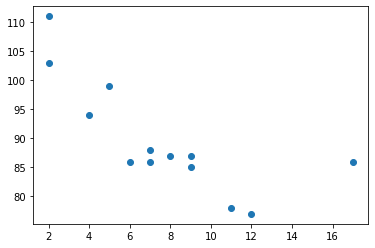

In [4]:
# Plot the sample data
plt.scatter(x,y)
plt.show()

In [5]:
# Compute linear regression
slope, intercept, r, p, std_err = stats.linregress(x,y)

# Print the parameters
print(slope)
print(intercept)
print(r)
print(p)
print(std_err)

-1.751287711552612
103.10596026490066
-0.7585915243761551
0.002646873922456101
0.45353615760774196


In [6]:
# Get the model predictions
# Define function to apply the model
def lin_predictor_func(x):
    return slope * x + intercept

# Apply function to x data
y_predicted = list(map(lin_predictor_func,x))

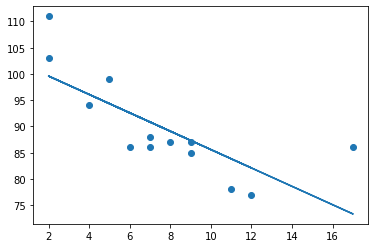

In [7]:
# Plot the data and the predictive trend line
plt.scatter(x,y)
plt.plot(x,y_predicted)
plt.show()

In [8]:
# Generate random data
data_length = 100
x_test = rng.random(data_length)
y_test = 1.6*x_test + rng.random(data_length)

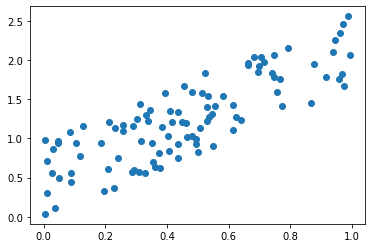

In [9]:
plt.scatter(x_test,y_test)
plt.show()

In [10]:
result = stats.linregress(x_test,y_test)
print(result.slope)
print(result.intercept)
print(result.stderr)

1.6419327687612397
0.49128094441359116
0.11198919464818585


In [11]:
def linear_function(x):
    return result.slope * x + result.intercept

In [12]:
y_pred = list(map(linear_function,x_test))

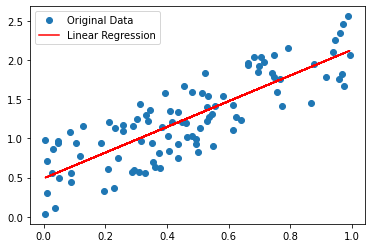

In [13]:
plt.plot(x_test,y_test,'o',label = 'Original Data')
plt.plot(x_test,y_pred,'r',label = 'Linear Regression')
plt.legend()
plt.show()

In [14]:
# Two-sided inverse Students t-distribution
# p - probability, df - degrees of freedom

tinv = lambda p, df: abs(stats.t.ppf(p/2,df))

In [15]:
ts = tinv(0.05, len(x_test) - 2)
ts

1.9844674544266925

In [16]:
print(f"slope (95%): {result.slope: .6f} +/- {ts * result.stderr: .6f}")

slope (95%):  1.641933 +/-  0.222239


In [17]:
print(f"intercept (95%): {result.intercept: .6f} +/- {ts * result.intercept_stderr: .6f}")

intercept (95%):  0.491281 +/-  0.119106


## Scikit-learn

In [23]:
# Load sample datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

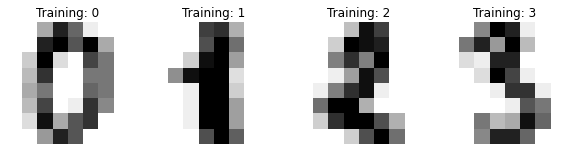

In [41]:
# Plot examples of digits data
_, axes = plt.subplots(nrows = 1, ncols = 4, figsize=(10,3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title("Training: %i" % label)

In [51]:
# Flatten the 2D images into 1D vectors
n_samples = len(digits.images)
data = digits.images.reshape((n_samples,-1))

# Create a Classifier: A support vector classifier
clf = svm.SVC(gamma = 0.001)

# Split the data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size = 0.5, shuffle = False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit in the test subset
predicted = clf.predict(X_test)

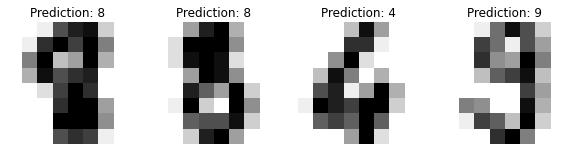

In [54]:
_, axes = plt.subplots(nrows = 1, ncols = 4, figsize=(10,3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8,8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Prediction: {prediction}")

In [55]:
print(
    f"Classification report for classifier {clf}: \n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001): 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




In [57]:
conf_matrix = metrics.confusion_matrix(y_test,predicted)
conf_matrix

array([[87,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 88,  1,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 85,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 79,  0,  3,  0,  4,  5,  0],
       [ 0,  0,  0,  0, 88,  0,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0, 88,  1,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 90,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 88,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 88,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 90]])

In [70]:
# Another test
clf = svm.SVC(gamma = 0.001, C=100.)
clf.fit(digits.data[:-1],digits.target[:-1])
clf.predict(digits.data[-1:])

array([8])

In [77]:
digits.data[-1:]

array([[ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.,  0.,  2., 16., 14.,  6.,
         1.,  0.,  0.,  0.,  0., 15., 15.,  8., 15.,  0.,  0.,  0.,  0.,
         5., 16., 16., 10.,  0.,  0.,  0.,  0., 12., 15., 15., 12.,  0.,
         0.,  0.,  4., 16.,  6.,  4., 16.,  6.,  0.,  0.,  8., 16., 10.,
         8., 16.,  8.,  0.,  0.,  1.,  8., 12., 14., 12.,  1.,  0.]])

In [78]:
clf.get_params()

{'C': 100.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.001,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}